In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [18]:
iris_data=pd.read_csv('Iris.csv')
iris_data.head()
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris_data.drop('Id',inplace=True,axis=1)
X=iris_data.drop('Species',axis=1)
y=iris_data['Species']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [21]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [22]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

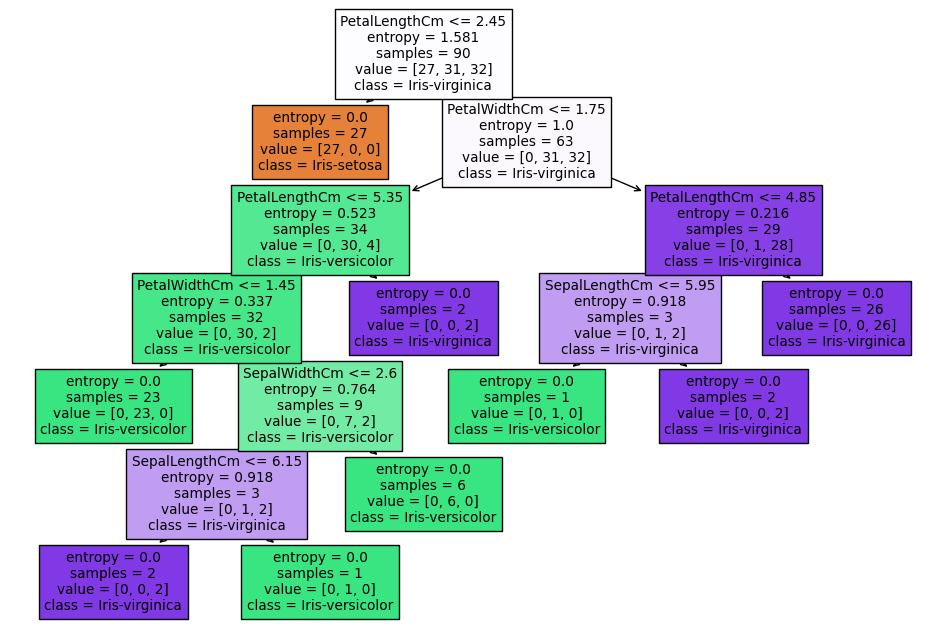

In [23]:
plt.figure(figsize=(12,8))
plot_tree(dt_classifier,feature_names=X.columns, class_names=dt_classifier.classes_,filled=True)
plt.show()

In [24]:
y_pred=dt_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9833333333333333


Confusion Matrix:
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



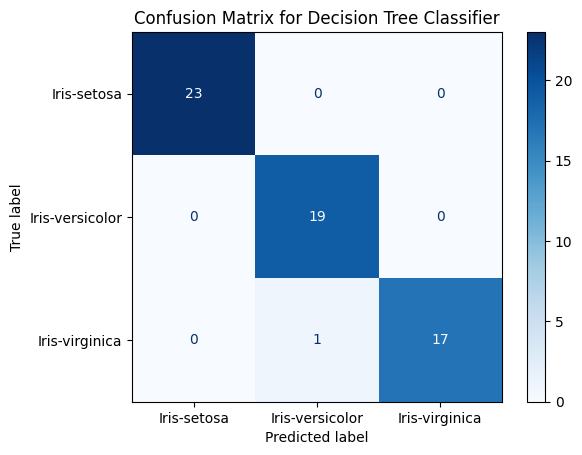

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris_data['Species'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()